In [97]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pl
%matplotlib inline

In [98]:
# set parameters

# cross-section in units-squared
sigma = 20
# number of particles 
N = 500
# size of box
l = 100
# maximum start velocity
maxv = 10
# timestep
dt = 0.1
# particle mass
m1 = 1
m2 = 1

In [99]:
# set initial conditions 

# radius of a particle
r = np.sqrt(sigma/np.pi)
# random positions assuming square box of side-length l reaching from the origin to (x,y) = (l,l)
x = np.random.rand(N)*l
y = np.random.rand(N)*l
# random velocities
v = np.random.rand(N)*maxv
theta = np.random.rand(N)*2*np.pi
vx = v*np.cos(theta)
vy = v*np.sin(theta)
# random masses
condition = np.floor(np.random.rand(N)*2)
m = np.array([m1 if c else m2 for c in condition])

In [100]:
# function to enforce hard wall boundary conditions - does not conserve momentum in collisions with walls
def hard_wall(x, y, vx, vy):
    out = outside(x, y)
    if not out:
        return vx, vy
    if out == 1 or out == 2:
        return -vx, vy
    if out == 3 or out == 4:
        return vx, -vy

# function to enforce periodic boundaries
def periodic(x, y):
    out = outside(x, y)
    if not out:
        return x, y
    if out == 1 or out == 2:
        return x % l, y
    if out == 3 or out == 4:
        return x, y % l
    
# returns zero if the coordinates are inside the simulation space, and 1, 2, 3, or 4 if the particle is 
# outside the left, right, top, or bottom boundary respectively. 
def outside(x, y):
    if x < 0:
        return 1
    if x > l:
        return 2
    if y > l: 
        return 3
    if y < 0: 
        return 4
    
# function to check for collisions
def coll_check(x1, y1, x2, y2):
    if dist(x1, y1, x2, y2) < r:
        return True
    else: 
        return False

# computes distance between two points
def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2. + (y1 - y2)**2.)

# plot the particle positions and velocity distribution
def plot_sim(x, y, vx, vy):
    fig = pl.figure(figsize = (20, 4))
    pl.subplot(131)
    pl.hist(np.sqrt(vx*vx + vy*vy), bins=20);
    pl.xlabel('velocity')
    pl.ylabel('N(v)')
    pl.title('velocity distribution')
    pl.subplot(132)
    pl.plot(x, y, '.')
    pl.xlabel('x')
    pl.ylabel('y')
    pl.title('particle positions')

def collide(x1, x2, y1, y2, vx1, vx2, vy1, vy2, m1, m2):
    theta = np.arctan((y1-y2)/(x1-x2))
    vi_norm = vx1*np.cos(theta) + vy1*np.sin(theta)
    vj_norm = vx2*np.cos(theta) + vy2*np.sin(theta)
    vi_tan = vx1*np.sin(theta) - vy1*np.cos(theta)
    vj_tan = vx2*np.sin(theta) - vy2*np.cos(theta)
    vi_norm_tmp = vi_norm
    vi_norm = m2*vj_norm/m1
    vj_norm = m1*vi_norm_tmp/m2
    vx1 = vi_norm*np.cos(theta) + vi_tan*np.sin(theta)
    vy1 = vi_norm*np.sin(theta) - vi_tan*np.cos(theta)
    vx2 = vj_norm*np.cos(theta) + vj_tan*np.sin(theta)
    vy2 = vj_norm*np.sin(theta) - vj_tan*np.cos(theta)
    return vx1, vx2, vy1, vy2
    
    
# run the simulation and return the linear pressure at each step
def step(x, y, vx, vy):
    pressure = 0
    for i in range(len(x)):
        # hard wall boundary conditions
        #vx[i], vy[i] = hard_wall(x[i], y[i], vx[i], vy[i])
        # periodic boundary conditions
        if outside(x[i], y[i]) == 2:
            pressure += np.abs(2*m[i]*vx[i])
        x[i], y[i] = periodic(x[i], y[i])
        for j in range(i):
            if coll_check(x[i], y[i], x[j], y[j]):
                vx[i], vx[j], vy[i], vy[j] = collide(x[i], x[j], y[i], y[j], vx[i], vx[j], vy[i], vy[j], m[i], m[j])   
        # step particle positions        
        x[i] += vx[i]*dt
        y[i] += vy[i]*dt
    return pressure/(l*dt)

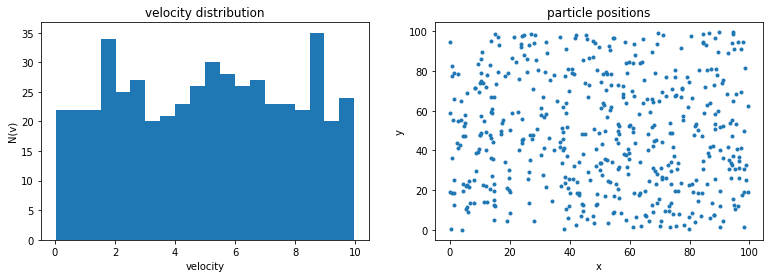

In [101]:
# plot initial configuration
plot_sim(x, y, vx, vy)

[  9.70992632e+01   8.66060995e+01   2.50250367e+01   3.29067707e+01
   4.19806713e+01   1.73127787e+01   8.89178463e+01   3.98295004e+01
   7.38337389e+01   3.07386760e+01   9.03060507e+01   5.80844146e+01
   6.07545164e+01   7.59821015e-01   1.97364201e+01   5.60114031e+01
   9.97334810e+01   1.23267353e+01   1.84493185e+01   4.86854475e+01
   7.09055104e+00   8.73628996e+00   5.49332890e+01   4.61204915e+01
   8.67376060e+01   6.97566040e+01   1.90089118e+01   7.28785543e+01
   9.51772181e+01   2.20302276e+00   4.23342829e+01   3.53716732e+01
   7.99655252e+00   6.66985079e+01   5.46792995e+01   1.66563868e+01
   8.56782599e+01   7.09136132e+01   4.04073763e+01   3.65405487e+01
   6.39425304e+01   2.94559290e+01   5.20805484e+01   4.15419192e+01
   7.92333656e+01   9.06107770e+01   8.34858950e+01   7.98622596e+01
   5.04664826e+01   4.91860446e+01   5.20419608e+01   2.09096687e+00
   9.08757833e+01   7.96284941e+01   9.91193338e+01   8.91764417e+01
   3.30741152e+01   6.60621797e+01

[  9.71461710e+01   8.65303935e+01   2.49107768e+01   3.30025450e+01
   4.18763756e+01   1.74649018e+01   8.88165419e+01   3.97288476e+01
   7.38386435e+01   3.06628517e+01   9.01916486e+01   5.80825853e+01
   6.07555444e+01   8.22737494e-01   1.97437603e+01   5.60376136e+01
   9.96338696e+01   1.23317455e+01   1.84467527e+01   4.87973584e+01
   7.23020115e+00   8.74403280e+00   5.48738695e+01   4.61991904e+01
   8.66645390e+01   6.97196264e+01   1.90590690e+01   7.28950277e+01
   9.51207407e+01   2.24336541e+00   4.24469888e+01   3.53091867e+01
   8.11223231e+00   6.67718531e+01   5.47332981e+01   1.64696227e+01
   8.55662429e+01   7.08516278e+01   4.03765595e+01   3.63623949e+01
   6.38495506e+01   2.93816693e+01   5.19139416e+01   4.15318936e+01
   7.92532449e+01   9.05206461e+01   8.34796372e+01   7.97953691e+01
   5.06865860e+01   4.91221024e+01   5.22051922e+01   2.04400644e+00
   9.08965825e+01   7.97698723e+01   9.91734612e+01   8.93718715e+01
   3.31075777e+01   6.61322733e+01

[  9.71930788e+01   8.64546875e+01   2.47965170e+01   3.30983193e+01
   4.18012602e+01   1.75823485e+01   8.87152375e+01   3.98156471e+01
   7.38670265e+01   3.07082193e+01   9.01330660e+01   5.80807559e+01
   6.07565724e+01   8.85653973e-01   1.96432614e+01   5.60638240e+01
   9.96257099e+01   1.24246705e+01   1.83971439e+01   4.88062798e+01
   7.32532008e+00   8.77079721e+00   5.48432225e+01   4.62778894e+01
   8.65914721e+01   6.96578139e+01   1.90998916e+01   7.29347313e+01
   9.51781432e+01   2.25765380e+00   4.25070890e+01   3.52278234e+01
   8.25079719e+00   6.68451983e+01   5.47102988e+01   1.63827882e+01
   8.54542259e+01   7.07960141e+01   4.04460108e+01   3.61842411e+01
   6.39462835e+01   2.94285664e+01   5.17588590e+01   4.15255569e+01
   7.92731242e+01   9.05360235e+01   8.34913194e+01   7.97284786e+01
   5.09066894e+01   4.90581601e+01   5.20941564e+01   2.06492666e+00
   9.09173816e+01   7.98003725e+01   9.92275887e+01   8.95673013e+01
   3.31689854e+01   6.62046840e+01

[ 97.23998664  86.37898144  24.68225714  33.19409358  41.64946961
  17.61364091  88.71797822  39.84380153  73.87217919  30.63243011
  90.05027488  58.0789266   60.75760045   0.94857045  19.64693493
  56.09003449  99.51111108  12.41793777  18.41027835  48.91258169
   7.50051215   8.77771227  54.8165725   46.35658835  86.5184051
  69.71133469  19.0718486   72.95151033  95.15253467   2.34175744
  42.62144489  35.23886106   8.35717242  66.91854344  54.74853623
  16.33740633  85.34220894  70.75248217  40.43727903  36.02219406
  63.85011107  29.35457875  51.56307409  41.52433291  79.29300352
  90.44710722  83.48702443  79.66158815  51.12679286  48.9942179
  52.25750512   2.01024811  90.93818081  79.88646469  99.28171614
  89.76273113  33.20232393  66.14107489  63.92702274  55.93836114
  32.67211664  40.26675533  26.85651194  13.38360324   4.96464798
  59.17462941  95.63471451  27.72269339  57.42801136  91.49495996
  38.07281543  33.25883603  96.04516688  35.04997954  79.86729077
  43.6629282

[ 97.28689444  86.30327542  24.56799729  33.28986788  41.56752903
  17.63100276  88.720719    39.74454223  73.90025653  30.67752567
  89.94748594  58.07709726  60.75862846   1.01148693  19.5626768
  56.11624496  99.3968312   12.50142911  18.35566938  48.87121467
   7.63770039   8.81152333  54.73784281  46.43528731  86.44533815
  69.61227046  19.00402509  72.99096392  95.23326122   2.3954653
  42.6912546   35.15672818   8.4860894   66.99188861  54.81158139
  16.25273919  85.23019197  70.68496414  40.43486042  35.86014703
  63.94937394  29.4014188   51.41084447  41.50738436  79.31288282
  90.41487237  83.5010841   79.59469765  51.34689628  48.93027566
  52.14593646   1.96480653  90.95897998  79.91196043  99.3358436
  89.95816094  33.26385375  66.23994142  63.92925323  55.84340587
  32.62508431  40.15733353  26.77270543  13.28921252   5.09231789
  59.14759633  95.56687621  27.65923681  57.43844057  91.57805849
  38.11281519  33.32644887  95.978004    35.00148308  79.80613345
  43.6473724 

KeyboardInterrupt: 

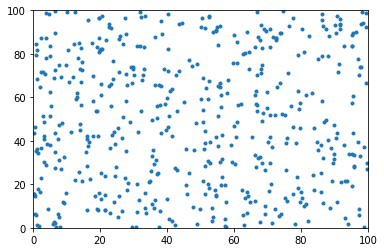

In [110]:
# animate particle motions

from matplotlib import animation

fig = pl.figure()
ax = pl.axes(xlim=(0, 100), ylim=(0, 100))
line, = ax.plot([], [], '.')

def init():
    line.set_data([],[])
    return line,

def animate(i):
    pressure.append(step(x, y, vx, vy))
    line.set_data(x, y)
    print(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)
anim.save('particles.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [104]:
# compute temperature and pressure. Modify for density by looping over side-lengths rather than max velocity.
temps = []
vels = np.linspace(2, 20, 1)
pressure = []
for maxv in vels:
    v = np.random.rand(N)*maxv
    theta = np.random.rand(N)*2*np.pi
    vx = v*np.cos(theta)
    vy = v*np.sin(theta)
    p = 0
    for i in range(100):
        p += step(x, y, vx, vy)
    kT = np.sum(0.5*v*v*m)
    temps.append(kT)
    pressure.append(p/100)

Text(0,0.5,'Pressure (dyn/cm$^{-2}$)')

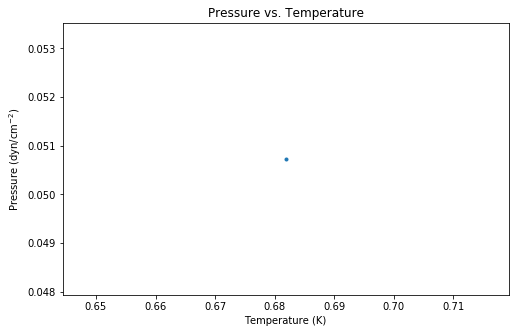

In [105]:
# plot temperature vs. pressure. Modify this for density vs. pressure.
fig = pl.figure(figsize=(8, 5))
pl.plot(np.array(temps)/N, pressure, '.')
pl.title('Pressure vs. Temperature')
pl.xlabel('Temperature (K)')
pl.ylabel(r'Pressure (dyn/cm$^{-2}$)')

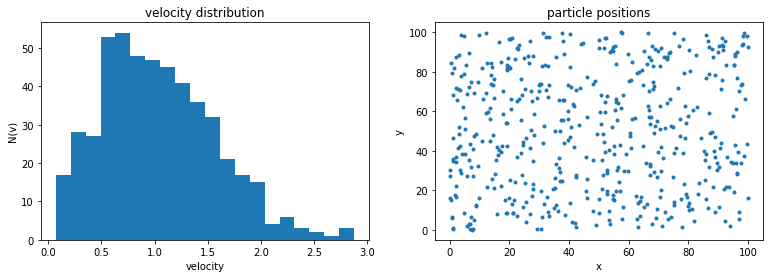

In [106]:
# plot final configuration
plot_sim(x, y, vx, vy)

In [109]:
# make a smooth histogram by running a bunch of simulations
N = 100

velocities = []
def sample_velocity(n, check):
    # random positions
    x = np.random.rand(N)*l
    y = np.random.rand(N)*l
    # random velocities
    v = np.random.rand(N)*maxv
    theta = np.random.rand(N)*2*np.pi
    vx = v*np.cos(theta)
    vy = v*np.sin(theta)
    for i in range(n):
        step(x, y, vx, vy)
        if i % check == 0:
            velocities.append([vx, vy])
            # random positions assuming square box of side-length l reaching from the origin to (x,y) = (l,l)
            x = np.random.rand(N)*l
            y = np.random.rand(N)*l
            # random velocities
            v = np.random.rand(N)*maxv
            theta = np.random.rand(N)*2*np.pi
            vx = v*np.cos(theta)
            vy = v*np.sin(theta)
            # random masses
            condition = np.floor(np.random.rand(N)*2)
            m = np.array([m1 if c else m2 for c in condition])
            
sample_velocity(5000, 100)

In [ ]:
# plot smooth histograms with analytic maxwellians. 

import scipy.constants as c

def maxwellian(v, T, m, N):
    return N*m*v*np.exp(-m*v*v/(c.k*1e24*T))/(c.k*1e24*T)

fig = pl.figure(figsize=(10, 10))

v = np.array(velocities)
vx = np.concatenate(v[:,0])
vy = np.concatenate(v[:,1])
bins = pl.hist(np.sqrt(vx*vx + vy*vy), bins=20, label='simulation data');
v = np.linspace(0, 20, 1000)
pl.plot(v, maxwellian(v, 2.47, 1, 12000), label='maxwellian with m=10')
pl.title('Velocity Distribution for 100 particles')
pl.xlabel('velocity')
pl.ylabel('N(v)')
pl.legend()
print(4*4/(2*c.k*1e24))
print(len(vx))

In [ ]:
# test the relaxation time numerically by comparing two halves of the velocity distribution to see that it follows 
# a Maxwellian

from scipy.stats import mode

def is_relaxed(vx, vy):
    v = np.sqrt(vx*vx + vy*vy)
    bins = np.linspace(min(v), max(v), 20)
    max_bin = mode(np.digitize(v, bins=bins))[0][0]
    mid = np.sqrt(2*np.log(2))*(bins[max_bin] + bins[max_bin-1])/2
    pop_low = len(v[v < mid])
    diff = 2-N/pop_low
    return np.abs(diff) < 0.1

In [ ]:
# compute the relaxation time by stepping until the is_relaxed condition is met

def relax_time():
    relaxed = False
    i = 0
    while not relaxed:
        step(x, y, vx, vy)
        i += 1
        if is_relaxed(vx, vy):
            relaxed = True
    return i

In [ ]:
fig = pl.figure(figsize=(8, 5))

pl.plot(np.arange(0.5, 2, 0.1), dt*np.array(times), 'o', label='Time for velocity distribution to become Maxwellian')
r = np.sqrt(20/np.pi)
r = np.linspace(0.5, 2, 1000)
dens = 1/100
pl.plot(r, 1./(2*r*dens*np.median(v)), label='Theoretical time between collisions')

pl.legend()
pl.title('Relaxation Time vs. Particle Radius')
pl.xlabel('Particle Radius (nm)')
pl.ylabel('Relaxation Time (Seconds)')